Exno:1
Data Cleaning Process

AIM

To read the given data and perform data cleaning and save the cleaned data to a file.

Explanation

Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect ,incompleted , irrelevant , duplicated or improperly formatted. Data cleaning is not simply about erasing data ,but rather finding a way to maximize datasets accuracy without necessarily deleting the information.




EQUIPMENT REQUIRED

1. Hardware: Personal Computer (PC)

2. Software: Jupyter Notebook / VS Code and Python 3.x


THEORY

Data cleaning is an essential step in data analysis that improves data quality by removing or correcting incorrect, incomplete, or inconsistent data.

Outlier detection is a key task in data cleaning, used to identify abnormal values that deviate significantly from the rest of the dataset.

1. IQR (Interquartile Range) Method

Q1 → 25th percentile

Q3 → 75th percentile

IQR = Q3 − Q1

Outlier condition:

Below: Q1 − 1.5 × IQR

Above: Q3 + 1.5 × IQR

This method is effective for skewed data.


2. Z-Score Method

Z-score measures how far a data point is from the mean.

![image.png](attachment:image.png)

If:

Z > 3 or Z < −3 → Outlier

This method works best for normally distributed data.

Algorithm

STEP 1: Read the given Data

STEP 2: Get the information about the data

STEP 3: Remove the null values from the data

STEP 4: Save the Clean data to the file

STEP 5: Remove outliers using IQR

STEP 6: Use zscore of to remove outliers




In [2]:
!pip install scipy 
!pip install seaborn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
    --------------------------------------- 0.5/36.3 MB 2.5 MB/s eta 0:00:15
   - -------------------------------------- 1.0/36.3 MB 2.6 MB/s eta 0:00:14
   - -------------------------------------- 1.6/36.3 MB 2.5 MB/s eta 0:00:14
   -- ------------------------------------- 2.1/36.3 MB 2.5 MB/s eta 0:00:14
   --- ------------------------------------ 2.9/36.3 MB 2.6 MB/s eta 0:00:13
   --- ------------------------------------ 3.4/36.3 MB 2.6 MB/s eta 0:00:13
   ---- ----------------------------------- 4.2/36.3 MB 2.8 MB/s eta 0:00:12
   ----- ---------------------------------- 5.0/36.3 MB 2.9 MB/s eta 0:00:11
   ------ --------------------------------- 6.0/36.3 MB 3.1 MB/s eta 0:00:10
   ------- -------------------------------- 6.8/36.3 MB 3.2 MB/s eta 0:00:10
   -------- ------------------------------- 7.9/36.3 MB 3.4 MB/s eta 0:00:09
   --


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Jenoviya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 6.3 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 4.1 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 4.0 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 3.2 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 3.1 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 3.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 2.8 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 2.8 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 2.4 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 2.5 MB/s eta 0:00:02
   ---------------------------- ----------- 5.8/8.1 MB 2.5 MB/s eta 0:00:01
   --------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Jenoviya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Jenoviya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

1.DataFrame "Loan_data"

In [ ]:
df1 = pd.read_csv('Loan_data.csv')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
df1.info()
df1.describe()

<class 'pandas.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    str    
 1   Gender             356 non-null    str    
 2   Married            367 non-null    str    
 3   Dependents         357 non-null    str    
 4   Education          367 non-null    str    
 5   Self_Employed      344 non-null    str    
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    str    
dtypes: float64(3), int64(2), str(7)
memory usage: 34.5 KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
df1.isnull()
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
df1_fill_0 = df1.fillna(0)
df1_fill_0

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [11]:
df1_ffill = df1.ffill()
df1_ffill

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [12]:
df1_bfill = df1.bfill()
df1_bfill

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [13]:
df1['CoapplicantIncome'] = df1['CoapplicantIncome'].fillna(df1['CoapplicantIncome'].mean())
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [14]:
df1_dropna = df1.dropna()
df1_dropna

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [23]:
df1_dropna.to_csv('clean_data_new.csv', index=False)

In [25]:
df2 = pd.read_csv('clean_data_new.csv')
df2.head()
df2.info()
df2.describe()

<class 'pandas.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    str    
 1   Gender             289 non-null    str    
 2   Married            289 non-null    str    
 3   Dependents         289 non-null    str    
 4   Education          289 non-null    str    
 5   Self_Employed      289 non-null    str    
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    str    
dtypes: float64(3), int64(2), str(7)
memory usage: 27.2 KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,289.000000,289.000000,289.000000,289.000000,289.000000
mean,4637.352941,1528.262976,136.792388,342.671280,0.840830
std,4790.683934,2377.599209,59.699582,65.655503,0.366469
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2875.000000,0.000000,102.000000,360.000000,1.000000
50%,3833.000000,879.000000,126.000000,360.000000,1.000000
75%,5000.000000,2400.000000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,460.000000,480.000000,1.000000


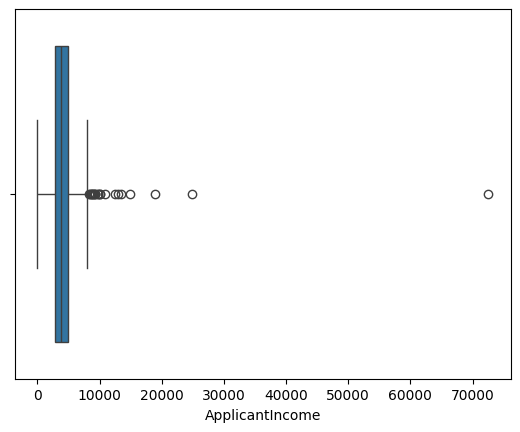

In [27]:
sns.boxplot(x=df2['ApplicantIncome'])
plt.show()


In [28]:
Q1 = df2['ApplicantIncome'].quantile(0.25)
Q3 = df2['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 2125.0


In [30]:
outliers_iqr = df2[
    (df2['ApplicantIncome'] < (Q1 - 1.5 * IQR)) |
    (df2['ApplicantIncome'] > (Q3 + 1.5 * IQR))
]
outliers_iqr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
13,LP001108,Male,Yes,0,Graduate,No,9226,7916,300.0,360.0,1.0,Urban
65,LP001428,Male,Yes,3+,Graduate,No,72529,0,360.0,360.0,1.0,Urban
67,LP001446,Male,Yes,0,Graduate,No,8449,0,257.0,360.0,1.0,Rural
73,LP001483,Male,Yes,3+,Graduate,No,13518,0,390.0,360.0,1.0,Rural
80,LP001517,Male,Yes,3+,Graduate,No,9719,0,61.0,360.0,1.0,Urban
99,LP001655,Female,No,0,Graduate,No,12500,0,300.0,360.0,0.0,Urban
114,LP001794,Male,Yes,2,Graduate,Yes,10890,0,260.0,12.0,1.0,Rural
115,LP001797,Female,No,0,Graduate,No,12941,0,150.0,300.0,1.0,Urban
117,LP001817,Male,No,0,Not Graduate,Yes,8703,0,199.0,360.0,0.0,Rural
149,LP002056,Male,Yes,2,Graduate,No,9167,0,235.0,360.0,1.0,Semiurban


In [32]:
data_cleaned = df2[
    ~((df2['ApplicantIncome'] < (Q1 - 1.5 * IQR)) |
      (df2['ApplicantIncome'] > (Q3 + 1.5 * IQR)))
]
data_cleaned

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
283,LP002962,Male,No,0,Graduate,No,4000,2667,152.0,360.0,1.0,Semiurban
284,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
285,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
286,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban


In [33]:
data = [1,12,15,18,21,24,27,30,33,36,39,42,45,48,51,
        54,57,60,63,66,69,72,75,78,81,84,87,90,93]

df3 = pd.DataFrame(data, columns=['values'])
df3

,values
0,1
1,12
2,15
3,18
4,21
5,24
6,27
7,30
8,33
9,36


In [34]:
z_scores = np.abs(stats.zscore(df3))
z_scores

array([[1.9424333 ],
       [1.51272718],
       [1.3955346 ],
       [1.27834203],
       [1.16114945],
       [1.04395687],
       [0.92676429],
       [0.80957171],
       [0.69237914],
       [0.57518656],
       [0.45799398],
       [0.3408014 ],
       [0.22360883],
       [0.10641625],
       [0.01077633],
       [0.12796891],
       [0.24516148],
       [0.36235406],
       [0.47954664],
       [0.59673922],
       [0.7139318 ],
       [0.83112437],
       [0.94831695],
       [1.06550953],
       [1.18270211],
       [1.29989468],
       [1.41708726],
       [1.53427984],
       [1.65147242]])

In [35]:
threshold = 3
outliers_z = df3[z_scores > threshold]
print("Outliers:")
outliers_z

Outliers:


,values


In [36]:
df3_cleaned = df3[z_scores <= threshold]
df3_cleaned

,values
0,1
1,12
2,15
3,18
4,21
5,24
6,27
7,30
8,33
9,36


2.DataFrame "Dataset"

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
a = pd.read_csv('Data_set.csv')
a.head()

,show_name,country,num_episodes,aired_on,original_network,rating,current_overall_rank,lifetime_popularity_rank,watchers
0,NaN,South Korea,16,"Friday, Saturday",tvN,8.9,33.0,1,111706.0
1,NaN,South Korea,16,"Friday, Saturday",jTBC,8.7,89.0,2,100950.0
2,Descendants of the Sun,South Korea,16,"Wednesday, Thursday",KBS2,8.7,77.0,3,96318.0
3,Boys Over Flowers,South Korea,25,"Monday, Tuesday",KBS2,7.7,2249.0,4,94228.0
4,W,South Korea,16,"Wednesday, Thursday",MBC,8.5,201.0,5,92121.0


In [3]:
a.info()
a.describe()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   show_name                 96 non-null     str    
 1   country                   100 non-null    str    
 2   num_episodes              100 non-null    int64  
 3   aired_on                  99 non-null     str    
 4   original_network          99 non-null     str    
 5   rating                    96 non-null     float64
 6   current_overall_rank      97 non-null     float64
 7   lifetime_popularity_rank  100 non-null    int64  
 8   watchers                  97 non-null     float64
dtypes: float64(3), int64(2), str(4)
memory usage: 7.2 KB


,num_episodes,rating,current_overall_rank,lifetime_popularity_rank,watchers
count,100.000000,96.000000,97.000000,100.000000,97.000000
mean,18.980000,8.293750,731.247423,51.650000,52994.907216
std,6.846041,0.424714,857.597007,30.133164,17551.028458
min,8.000000,7.300000,2.000000,1.000000,34523.000000
25%,16.000000,8.100000,194.000000,25.750000,39545.000000
50%,16.000000,8.300000,441.000000,51.500000,46963.000000
75%,20.000000,8.600000,806.000000,77.250000,63140.000000
max,50.000000,9.100000,3788.000000,103.000000,111706.000000


In [4]:
a.isnull()
a.isnull().sum()

show_name                   4
country                     0
num_episodes                0
aired_on                    1
original_network            1
rating                      4
current_overall_rank        3
lifetime_popularity_rank    0
watchers                    3
dtype: int64

In [5]:
a_fill_0 = a.fillna(0)
a_fill_0

,show_name,country,num_episodes,aired_on,original_network,rating,current_overall_rank,lifetime_popularity_rank,watchers
0,0,South Korea,16,"Friday, Saturday",tvN,8.9,33.0,1,111706.0
1,0,South Korea,16,"Friday, Saturday",jTBC,8.7,89.0,2,100950.0
2,Descendants of the Sun,South Korea,16,"Wednesday, Thursday",KBS2,8.7,77.0,3,96318.0
3,Boys Over Flowers,South Korea,25,"Monday, Tuesday",KBS2,7.7,2249.0,4,94228.0
4,W,South Korea,16,"Wednesday, Thursday",MBC,8.5,201.0,5,92121.0
...,...,...,...,...,...,...,...,...,...
95,Shut Up: Flower Boy Band,South Korea,16,"Monday, Tuesday",tvN,8.1,806.0,99,34668.0
96,Blood,South Korea,20,"Monday, Tuesday",KBS2,7.4,3271.0,100,34666.0
97,Chicago Typewriter,South Korea,16,"Friday, Saturday",tvN,8.8,51.0,101,0.0
98,Sungkyunkwan Scandal,South Korea,20,"Monday, Tuesday",KBS2,8.2,605.0,102,34615.0


In [6]:
a_ffill = a.ffill()
a_ffill

,show_name,country,num_episodes,aired_on,original_network,rating,current_overall_rank,lifetime_popularity_rank,watchers
0,NaN,South Korea,16,"Friday, Saturday",tvN,8.9,33.0,1,111706.0
1,NaN,South Korea,16,"Friday, Saturday",jTBC,8.7,89.0,2,100950.0
2,Descendants of the Sun,South Korea,16,"Wednesday, Thursday",KBS2,8.7,77.0,3,96318.0
3,Boys Over Flowers,South Korea,25,"Monday, Tuesday",KBS2,7.7,2249.0,4,94228.0
4,W,South Korea,16,"Wednesday, Thursday",MBC,8.5,201.0,5,92121.0
...,...,...,...,...,...,...,...,...,...
95,Shut Up: Flower Boy Band,South Korea,16,"Monday, Tuesday",tvN,8.1,806.0,99,34668.0
96,Blood,South Korea,20,"Monday, Tuesday",KBS2,7.4,3271.0,100,34666.0
97,Chicago Typewriter,South Korea,16,"Friday, Saturday",tvN,8.8,51.0,101,34666.0
98,Sungkyunkwan Scandal,South Korea,20,"Monday, Tuesday",KBS2,8.2,605.0,102,34615.0


In [7]:
a_bfill = a.bfill()
a_bfill

,show_name,country,num_episodes,aired_on,original_network,rating,current_overall_rank,lifetime_popularity_rank,watchers
0,Descendants of the Sun,South Korea,16,"Friday, Saturday",tvN,8.9,33.0,1,111706.0
1,Descendants of the Sun,South Korea,16,"Friday, Saturday",jTBC,8.7,89.0,2,100950.0
2,Descendants of the Sun,South Korea,16,"Wednesday, Thursday",KBS2,8.7,77.0,3,96318.0
3,Boys Over Flowers,South Korea,25,"Monday, Tuesday",KBS2,7.7,2249.0,4,94228.0
4,W,South Korea,16,"Wednesday, Thursday",MBC,8.5,201.0,5,92121.0
...,...,...,...,...,...,...,...,...,...
95,Shut Up: Flower Boy Band,South Korea,16,"Monday, Tuesday",tvN,8.1,806.0,99,34668.0
96,Blood,South Korea,20,"Monday, Tuesday",KBS2,7.4,3271.0,100,34666.0
97,Chicago Typewriter,South Korea,16,"Friday, Saturday",tvN,8.8,51.0,101,34615.0
98,Sungkyunkwan Scandal,South Korea,20,"Monday, Tuesday",KBS2,8.2,605.0,102,34615.0


In [9]:
a['rating'] = a['rating'].fillna(a['rating'].mean())
a

,show_name,country,num_episodes,aired_on,original_network,rating,current_overall_rank,lifetime_popularity_rank,watchers
0,NaN,South Korea,16,"Friday, Saturday",tvN,8.9,33.0,1,111706.0
1,NaN,South Korea,16,"Friday, Saturday",jTBC,8.7,89.0,2,100950.0
2,Descendants of the Sun,South Korea,16,"Wednesday, Thursday",KBS2,8.7,77.0,3,96318.0
3,Boys Over Flowers,South Korea,25,"Monday, Tuesday",KBS2,7.7,2249.0,4,94228.0
4,W,South Korea,16,"Wednesday, Thursday",MBC,8.5,201.0,5,92121.0
...,...,...,...,...,...,...,...,...,...
95,Shut Up: Flower Boy Band,South Korea,16,"Monday, Tuesday",tvN,8.1,806.0,99,34668.0
96,Blood,South Korea,20,"Monday, Tuesday",KBS2,7.4,3271.0,100,34666.0
97,Chicago Typewriter,South Korea,16,"Friday, Saturday",tvN,8.8,51.0,101,NaN
98,Sungkyunkwan Scandal,South Korea,20,"Monday, Tuesday",KBS2,8.2,605.0,102,34615.0


In [10]:
a_dropna = a.dropna()
a_dropna

,show_name,country,num_episodes,aired_on,original_network,rating,current_overall_rank,lifetime_popularity_rank,watchers
2,Descendants of the Sun,South Korea,16,"Wednesday, Thursday",KBS2,8.7,77.0,3,96318.0
3,Boys Over Flowers,South Korea,25,"Monday, Tuesday",KBS2,7.7,2249.0,4,94228.0
4,W,South Korea,16,"Wednesday, Thursday",MBC,8.5,201.0,5,92121.0
5,You Who Came from the Stars,South Korea,21,"Wednesday, Thursday",SBS,8.6,112.0,6,91360.0
6,Weightlifting Fairy Kim Bok Joo,South Korea,16,"Wednesday, Thursday",MBC,8.8,40.0,7,91330.0
...,...,...,...,...,...,...,...,...,...
94,Flower of Evil,South Korea,16,"Wednesday, Thursday",tvN,9.1,4.0,98,34901.0
95,Shut Up: Flower Boy Band,South Korea,16,"Monday, Tuesday",tvN,8.1,806.0,99,34668.0
96,Blood,South Korea,20,"Monday, Tuesday",KBS2,7.4,3271.0,100,34666.0
98,Sungkyunkwan Scandal,South Korea,20,"Monday, Tuesday",KBS2,8.2,605.0,102,34615.0


In [11]:
a_dropna.to_csv('data_set_new', index=False)

In [12]:
da = pd.read_csv('Data_set.csv')
da.head()
da.info()
da.describe()   

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   show_name                 96 non-null     str    
 1   country                   100 non-null    str    
 2   num_episodes              100 non-null    int64  
 3   aired_on                  99 non-null     str    
 4   original_network          99 non-null     str    
 5   rating                    96 non-null     float64
 6   current_overall_rank      97 non-null     float64
 7   lifetime_popularity_rank  100 non-null    int64  
 8   watchers                  97 non-null     float64
dtypes: float64(3), int64(2), str(4)
memory usage: 7.2 KB


,num_episodes,rating,current_overall_rank,lifetime_popularity_rank,watchers
count,100.000000,96.000000,97.000000,100.000000,97.000000
mean,18.980000,8.293750,731.247423,51.650000,52994.907216
std,6.846041,0.424714,857.597007,30.133164,17551.028458
min,8.000000,7.300000,2.000000,1.000000,34523.000000
25%,16.000000,8.100000,194.000000,25.750000,39545.000000
50%,16.000000,8.300000,441.000000,51.500000,46963.000000
75%,20.000000,8.600000,806.000000,77.250000,63140.000000
max,50.000000,9.100000,3788.000000,103.000000,111706.000000


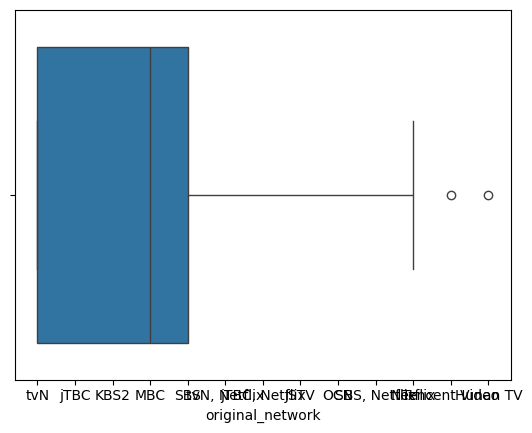

In [13]:
sns.boxplot(x=da['original_network'])
plt.show()


In [15]:
Q1 = da['num_episodes'].quantile(0.25)
Q3 = da['num_episodes'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 4.0


In [17]:
outliers_iqr = da[
    (da['num_episodes'] < (Q1 - 1.5 * IQR)) |
    (da['num_episodes'] > (Q3 + 1.5 * IQR))
]
outliers_iqr

,show_name,country,num_episodes,aired_on,original_network,rating,current_overall_rank,lifetime_popularity_rank,watchers
11,While You Were Sleeping,South Korea,32,"Wednesday, Thursday",SBS,8.7,61.0,12,77814.0
21,I'm Not a Robot,South Korea,32,"Wednesday, Thursday",MBC,8.5,229.0,22,63723.0
28,Suspicious Partner,South Korea,40,"Wednesday, Thursday",SBS,8.3,441.0,29,60007.0
46,Love O2O,China,30,"Monday, Tuesday, Wednesday, Thursday, Friday, ...",JSTV,8.4,266.0,48,48178.0
60,Extraordinary You,South Korea,32,"Wednesday, Thursday",MBC,8.4,281.0,62,43545.0
65,Love Alarm,South Korea,8,Thursday,Netflix,7.8,1647.0,68,41990.0
68,Are You Human Too?,South Korea,36,"Monday, Tuesday",KBS2,8.3,347.0,71,40554.0
70,The Untamed,China,50,"Monday, Tuesday, Wednesday",Tencent Video,9.1,5.0,73,39642.0
73,Meteor Garden,China,50,"Monday, Tuesday, Wednesday",Hunan TV,8.0,1090.0,76,39545.0
81,Hana Yori Dango,Japan,9,NaN,NaN,8.3,508.0,85,37920.0


In [18]:
da_cleaned = da[
    ~((da['num_episodes'] < (Q1 - 1.5 * IQR)) |
      (da['num_episodes'] > (Q3 + 1.5 * IQR)))
]
da_cleaned

,show_name,country,num_episodes,aired_on,original_network,rating,current_overall_rank,lifetime_popularity_rank,watchers
0,NaN,South Korea,16,"Friday, Saturday",tvN,8.9,33.0,1,111706.0
1,NaN,South Korea,16,"Friday, Saturday",jTBC,8.7,89.0,2,100950.0
2,Descendants of the Sun,South Korea,16,"Wednesday, Thursday",KBS2,8.7,77.0,3,96318.0
3,Boys Over Flowers,South Korea,25,"Monday, Tuesday",KBS2,7.7,2249.0,4,94228.0
4,W,South Korea,16,"Wednesday, Thursday",MBC,8.5,201.0,5,92121.0
...,...,...,...,...,...,...,...,...,...
95,Shut Up: Flower Boy Band,South Korea,16,"Monday, Tuesday",tvN,8.1,806.0,99,34668.0
96,Blood,South Korea,20,"Monday, Tuesday",KBS2,7.4,3271.0,100,34666.0
97,Chicago Typewriter,South Korea,16,"Friday, Saturday",tvN,8.8,51.0,101,NaN
98,Sungkyunkwan Scandal,South Korea,20,"Monday, Tuesday",KBS2,8.2,605.0,102,34615.0


In [19]:
data = [1,12,15,18,21,24,27,30,33,36,39,42,45,48,51,
        54,57,60,63,66,69,72,75,78,81,84,87,90,93]

a_z = pd.DataFrame(data, columns=['values'])
a_z

,values
0,1
1,12
2,15
3,18
4,21
5,24
6,27
7,30
8,33
9,36


In [20]:
z_scores = np.abs(stats.zscore(a_z))
z_scores

array([[1.9424333 ],
       [1.51272718],
       [1.3955346 ],
       [1.27834203],
       [1.16114945],
       [1.04395687],
       [0.92676429],
       [0.80957171],
       [0.69237914],
       [0.57518656],
       [0.45799398],
       [0.3408014 ],
       [0.22360883],
       [0.10641625],
       [0.01077633],
       [0.12796891],
       [0.24516148],
       [0.36235406],
       [0.47954664],
       [0.59673922],
       [0.7139318 ],
       [0.83112437],
       [0.94831695],
       [1.06550953],
       [1.18270211],
       [1.29989468],
       [1.41708726],
       [1.53427984],
       [1.65147242]])

In [21]:
threshold = 3
outliers_z = a_z[z_scores > threshold]
print("Outliers:")
outliers_z

Outliers:


,values


In [22]:
a_z_cleaned = a_z[z_scores <= threshold]
a_z_cleaned

,values
0,1
1,12
2,15
3,18
4,21
5,24
6,27
7,30
8,33
9,36


3.DataFrame "heights"

In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
b = pd.read_csv('heights.csv')
b.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [25]:
b.info()
b.describe()

<class 'pandas.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    14 non-null     str    
 1   height  14 non-null     float64
dtypes: float64(1), str(1)
memory usage: 356.0 bytes


,height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


In [26]:
b.isnull()
b.isnull().sum()

name      0
height    0
dtype: int64

In [27]:
b_fill_0 = b.fillna(0)
b_fill_0

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [28]:
b_ffill = b.ffill()
b_ffill

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [29]:
b_bfill = b.bfill()
b_bfill

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [31]:
b['height'] = b['height'].fillna(b['height'].mean())
b

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [32]:
b_dropna = b.dropna()
b_dropna

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [33]:
b_dropna.to_csv('heights_new.csv', index=False)

In [34]:
he = pd.read_csv('heights.csv')
he.head()
he.info()
he.describe()

<class 'pandas.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    14 non-null     str    
 1   height  14 non-null     float64
dtypes: float64(1), str(1)
memory usage: 356.0 bytes


,height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


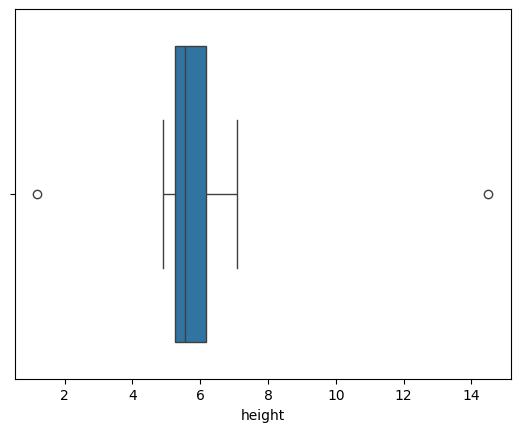

In [35]:
sns.boxplot(x=he['height'])
plt.show()

In [36]:
Q1 = he['height'].quantile(0.25)
Q3 = he['height'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 0.9249999999999998


In [37]:
outliers_iqr =he[
    (he['height'] < (Q1 - 1.5 * IQR)) |
    (he['height'] > (Q3 + 1.5 * IQR))
]
outliers_iqr

,name,height
9,imran,14.5
12,yoseph,1.2


In [38]:
he_cleaned = he[
    ~((he['height'] < (Q1 - 1.5 * IQR)) |
      (he['height'] > (Q3 + 1.5 * IQR)))
]
he_cleaned

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [39]:
data = [1,12,15,18,21,24,27,30,33,36,39,42,45,48,51,
        54,57,60,63,66,69,72,75,78,81,84,87,90,93]

b_z = pd.DataFrame(data, columns=['values'])
b_z

,values
0,1
1,12
2,15
3,18
4,21
5,24
6,27
7,30
8,33
9,36


In [40]:
z_scores = np.abs(stats.zscore(b_z))
z_scores

array([[1.9424333 ],
       [1.51272718],
       [1.3955346 ],
       [1.27834203],
       [1.16114945],
       [1.04395687],
       [0.92676429],
       [0.80957171],
       [0.69237914],
       [0.57518656],
       [0.45799398],
       [0.3408014 ],
       [0.22360883],
       [0.10641625],
       [0.01077633],
       [0.12796891],
       [0.24516148],
       [0.36235406],
       [0.47954664],
       [0.59673922],
       [0.7139318 ],
       [0.83112437],
       [0.94831695],
       [1.06550953],
       [1.18270211],
       [1.29989468],
       [1.41708726],
       [1.53427984],
       [1.65147242]])

In [41]:
threshold = 3
outliers_z = b_z[z_scores > threshold]
print("Outliers:")
outliers_z

Outliers:


,values


In [42]:
b_z_cleaned = b_z[z_scores <= threshold]
b_z_cleaned

,values
0,1
1,12
2,15
3,18
4,21
5,24
6,27
7,30
8,33
9,36


4.DataFrame "iris"

In [43]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
c = pd.read_csv('iris.csv')
c.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
c.info()
c.describe()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
c.isnull()
c.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [48]:
c_fill_0 = c.fillna(0)
c_fill_0

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [49]:
c_ffill = c.ffill()
c_ffill

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [50]:
c_bfill = c.bfill()
c_bfill

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
c['petal_width'] = c['petal_width'].fillna(c['petal_width'].mean())
c

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [55]:
c_dropna = c.dropna()
c_dropna

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [56]:
c_dropna.to_csv('heights_new.csv', index=False)

In [57]:
ir = pd.read_csv('iris.csv')
ir.head()
ir.info()
ir.describe()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


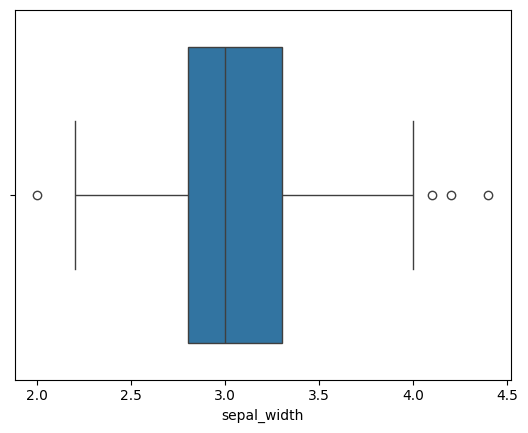

In [58]:
sns.boxplot(x=ir['sepal_width'])
plt.show()

In [59]:
Q1 = ir['sepal_width'].quantile(0.25)
Q3 = ir['sepal_width'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 0.5


In [60]:
outliers_iqr = ir[
    (ir['sepal_width'] < (Q1 - 1.5 * IQR)) |
    (ir['sepal_width'] > (Q3 + 1.5 * IQR))
]
outliers_iqr

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [61]:
ir_cleaned = ir[
    ~((ir['sepal_width'] < (Q1 - 1.5 * IQR)) |
      (ir['sepal_width'] > (Q3 + 1.5 * IQR)))
]
ir_cleaned

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [62]:
data = [1,12,15,18,21,24,27,30,33,36,39,42,45,48,51,
        54,57,60,63,66,69,72,75,78,81,84,87,90,93]

df_z = pd.DataFrame(data, columns=['values'])
df_z

,values
0,1
1,12
2,15
3,18
4,21
5,24
6,27
7,30
8,33
9,36


In [63]:
z_scores = np.abs(stats.zscore(df_z))
z_scores

array([[1.9424333 ],
       [1.51272718],
       [1.3955346 ],
       [1.27834203],
       [1.16114945],
       [1.04395687],
       [0.92676429],
       [0.80957171],
       [0.69237914],
       [0.57518656],
       [0.45799398],
       [0.3408014 ],
       [0.22360883],
       [0.10641625],
       [0.01077633],
       [0.12796891],
       [0.24516148],
       [0.36235406],
       [0.47954664],
       [0.59673922],
       [0.7139318 ],
       [0.83112437],
       [0.94831695],
       [1.06550953],
       [1.18270211],
       [1.29989468],
       [1.41708726],
       [1.53427984],
       [1.65147242]])

In [64]:
threshold = 3
outliers_z = df_z[z_scores > threshold]
print("Outliers:")
outliers_z


Outliers:


,values


In [65]:
df_z_cleaned = df_z[z_scores <= threshold]
df_z_cleaned

,values
0,1
1,12
2,15
3,18
4,21
5,24
6,27
7,30
8,33
9,36


5.DataFrame "SAMPLEIDS"

In [66]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [67]:
d = pd.read_csv('SAMPLEIDS.csv')
d.head()

,SNO,REGNO,NAME,DOB,GENDER,ADDRESS,M1,M2,M3,M4,TOTAL,AVG
0,1,1220121,ARUN,2000-02-10,MALE,THANDALAM,82.0,81.0,90.0,NaN,NaN,NaN
1,2,1220122,BABU,1999-01-25,MALE,KANCHIPURAM,56.0,61.0,80.0,56.0,253.0,84.333333
2,3,1220123,CHARAN,2000.09.21,MALE,THANDALAM,NaN,59.0,60.0,70.0,NaN,0.000000
3,4,1220124,DEVA,2000-11-09,MALE,POONAMALEE,74.0,79.0,80.0,74.0,307.0,102.333333
4,5,1220125,ESTER,2000-11-21,FEMALE,CHITHUR,92.0,95.0,96.0,92.0,375.0,125.000000


In [68]:
d.info()
d.describe()

<class 'pandas.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SNO      21 non-null     int64  
 1   REGNO    21 non-null     int64  
 2   NAME     20 non-null     str    
 3   DOB      21 non-null     str    
 4   GENDER   20 non-null     str    
 5   ADDRESS  20 non-null     str    
 6   M1       18 non-null     float64
 7   M2       19 non-null     float64
 8   M3       17 non-null     float64
 9   M4       18 non-null     float64
 10  TOTAL    16 non-null     float64
 11  AVG      20 non-null     float64
dtypes: float64(6), int64(2), str(4)
memory usage: 2.1 KB


,SNO,REGNO,M1,M2,M3,M4,TOTAL,AVG
count,21.000000,2.100000e+01,18.000000,19.000000,17.000000,18.000000,16.000000,20.000000
mean,10.333333,1.220130e+06,73.666667,74.315789,79.529412,73.166667,272.750000,72.733333
std,5.816643,5.816643e+00,17.580069,15.836149,13.010177,17.426315,102.048681,48.017127
min,1.000000,1.220121e+06,34.000000,45.000000,50.000000,34.000000,0.000000,0.000000
25%,6.000000,1.220126e+06,64.750000,62.500000,70.000000,65.500000,216.250000,40.750000
50%,10.000000,1.220130e+06,77.500000,77.000000,80.000000,75.000000,304.000000,78.666667
75%,15.000000,1.220135e+06,85.500000,86.500000,90.000000,85.500000,349.500000,113.333333
max,20.000000,1.220140e+06,96.000000,96.000000,96.000000,96.000000,383.000000,127.666667


In [69]:
d.isnull()
d.isnull().sum()

SNO        0
REGNO      0
NAME       1
DOB        0
GENDER     1
ADDRESS    1
M1         3
M2         2
M3         4
M4         3
TOTAL      5
AVG        1
dtype: int64

In [70]:
d_fill_0 = d.fillna(0)
d_fill_0

,SNO,REGNO,NAME,DOB,GENDER,ADDRESS,M1,M2,M3,M4,TOTAL,AVG
0,1,1220121,ARUN,2000-02-10,MALE,THANDALAM,82.0,81.0,90.0,0.0,0.0,0.000000
1,2,1220122,BABU,1999-01-25,MALE,KANCHIPURAM,56.0,61.0,80.0,56.0,253.0,84.333333
2,3,1220123,CHARAN,2000.09.21,MALE,THANDALAM,0.0,59.0,60.0,70.0,0.0,0.000000
3,4,1220124,DEVA,2000-11-09,MALE,POONAMALEE,74.0,79.0,80.0,74.0,307.0,102.333333
4,5,1220125,ESTER,2000-11-21,FEMALE,CHITHUR,92.0,95.0,96.0,92.0,375.0,125.000000
5,6,1220126,FARHANA,1999-03-05,FEMALE,THANDALAM,91.0,88.0,90.0,91.0,360.0,120.000000
6,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.0,219.0,73.000000
7,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.0,219.0,73.000000
8,8,1220128,HEMA,1999-01-25,FEMALE,POONAMALEE,95.0,96.0,90.0,95.0,376.0,125.333333
9,9,1220129,INDRA,2000.09.21,FEMALE,KANCHIPURAM,64.0,0.0,0.0,64.0,0.0,0.000000


In [71]:
d_ffill = d.ffill()
d_ffill

,SNO,REGNO,NAME,DOB,GENDER,ADDRESS,M1,M2,M3,M4,TOTAL,AVG
0,1,1220121,ARUN,2000-02-10,MALE,THANDALAM,82.0,81.0,90.0,NaN,NaN,NaN
1,2,1220122,BABU,1999-01-25,MALE,KANCHIPURAM,56.0,61.0,80.0,56.0,253.0,84.333333
2,3,1220123,CHARAN,2000.09.21,MALE,THANDALAM,56.0,59.0,60.0,70.0,253.0,0.000000
3,4,1220124,DEVA,2000-11-09,MALE,POONAMALEE,74.0,79.0,80.0,74.0,307.0,102.333333
4,5,1220125,ESTER,2000-11-21,FEMALE,CHITHUR,92.0,95.0,96.0,92.0,375.0,125.000000
5,6,1220126,FARHANA,1999-03-05,FEMALE,THANDALAM,91.0,88.0,90.0,91.0,360.0,120.000000
6,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.0,219.0,73.000000
7,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.0,219.0,73.000000
8,8,1220128,HEMA,1999-01-25,FEMALE,POONAMALEE,95.0,96.0,90.0,95.0,376.0,125.333333
9,9,1220129,INDRA,2000.09.21,FEMALE,KANCHIPURAM,64.0,96.0,90.0,64.0,376.0,0.000000


In [72]:
d_bfill = d.bfill()
d_bfill

,SNO,REGNO,NAME,DOB,GENDER,ADDRESS,M1,M2,M3,M4,TOTAL,AVG
0,1,1220121,ARUN,2000-02-10,MALE,THANDALAM,82.0,81.0,90.0,56.0,253.0,84.333333
1,2,1220122,BABU,1999-01-25,MALE,KANCHIPURAM,56.0,61.0,80.0,56.0,253.0,84.333333
2,3,1220123,CHARAN,2000.09.21,MALE,THANDALAM,74.0,59.0,60.0,70.0,307.0,0.000000
3,4,1220124,DEVA,2000-11-09,MALE,POONAMALEE,74.0,79.0,80.0,74.0,307.0,102.333333
4,5,1220125,ESTER,2000-11-21,FEMALE,CHITHUR,92.0,95.0,96.0,92.0,375.0,125.000000
5,6,1220126,FARHANA,1999-03-05,FEMALE,THANDALAM,91.0,88.0,90.0,91.0,360.0,120.000000
6,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.0,219.0,73.000000
7,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.0,219.0,73.000000
8,8,1220128,HEMA,1999-01-25,FEMALE,POONAMALEE,95.0,96.0,90.0,95.0,376.0,125.333333
9,9,1220129,INDRA,2000.09.21,FEMALE,KANCHIPURAM,64.0,45.0,50.0,64.0,163.0,0.000000


In [74]:
d['M4'] = d['M4'].fillna(d['M4'].mean())
d

,SNO,REGNO,NAME,DOB,GENDER,ADDRESS,M1,M2,M3,M4,TOTAL,AVG
0,1,1220121,ARUN,2000-02-10,MALE,THANDALAM,82.0,81.0,90.0,73.166667,NaN,NaN
1,2,1220122,BABU,1999-01-25,MALE,KANCHIPURAM,56.0,61.0,80.0,56.000000,253.0,84.333333
2,3,1220123,CHARAN,2000.09.21,MALE,THANDALAM,NaN,59.0,60.0,70.000000,NaN,0.000000
3,4,1220124,DEVA,2000-11-09,MALE,POONAMALEE,74.0,79.0,80.0,74.000000,307.0,102.333333
4,5,1220125,ESTER,2000-11-21,FEMALE,CHITHUR,92.0,95.0,96.0,92.000000,375.0,125.000000
5,6,1220126,FARHANA,1999-03-05,FEMALE,THANDALAM,91.0,88.0,90.0,91.000000,360.0,120.000000
6,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.000000,219.0,73.000000
7,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.000000,219.0,73.000000
8,8,1220128,HEMA,1999-01-25,FEMALE,POONAMALEE,95.0,96.0,90.0,95.000000,376.0,125.333333
9,9,1220129,INDRA,2000.09.21,FEMALE,KANCHIPURAM,64.0,NaN,NaN,64.000000,NaN,0.000000


In [75]:
d_dropna = d.dropna()
d_dropna

,SNO,REGNO,NAME,DOB,GENDER,ADDRESS,M1,M2,M3,M4,TOTAL,AVG
1,2,1220122,BABU,1999-01-25,MALE,KANCHIPURAM,56.0,61.0,80.0,56.000000,253.0,84.333333
3,4,1220124,DEVA,2000-11-09,MALE,POONAMALEE,74.0,79.0,80.0,74.000000,307.0,102.333333
4,5,1220125,ESTER,2000-11-21,FEMALE,CHITHUR,92.0,95.0,96.0,92.000000,375.0,125.000000
5,6,1220126,FARHANA,1999-03-05,FEMALE,THANDALAM,91.0,88.0,90.0,91.000000,360.0,120.000000
6,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.000000,219.0,73.000000
7,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.000000,219.0,73.000000
8,8,1220128,HEMA,1999-01-25,FEMALE,POONAMALEE,95.0,96.0,90.0,95.000000,376.0,125.333333
10,10,1220130,JAHITH,2000-11-09,MALE,THANDALAM,34.0,45.0,50.0,34.000000,163.0,54.333333
11,11,1220131,KANI,2000-11-21,FEMALE,CHITHUR,96.0,95.0,96.0,96.000000,383.0,127.666667
14,14,1220134,NANI,20001109,MALE,POONAMALEE,79.0,77.0,80.0,79.000000,315.0,105.000000


In [76]:
d_dropna.to_csv('SAMPLEIDS_new.csv', index=False)

In [77]:
sa = pd.read_csv('SAMPLEIDS.csv')
sa.head()
sa.info()
sa.describe()   

<class 'pandas.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SNO      21 non-null     int64  
 1   REGNO    21 non-null     int64  
 2   NAME     20 non-null     str    
 3   DOB      21 non-null     str    
 4   GENDER   20 non-null     str    
 5   ADDRESS  20 non-null     str    
 6   M1       18 non-null     float64
 7   M2       19 non-null     float64
 8   M3       17 non-null     float64
 9   M4       18 non-null     float64
 10  TOTAL    16 non-null     float64
 11  AVG      20 non-null     float64
dtypes: float64(6), int64(2), str(4)
memory usage: 2.1 KB


,SNO,REGNO,M1,M2,M3,M4,TOTAL,AVG
count,21.000000,2.100000e+01,18.000000,19.000000,17.000000,18.000000,16.000000,20.000000
mean,10.333333,1.220130e+06,73.666667,74.315789,79.529412,73.166667,272.750000,72.733333
std,5.816643,5.816643e+00,17.580069,15.836149,13.010177,17.426315,102.048681,48.017127
min,1.000000,1.220121e+06,34.000000,45.000000,50.000000,34.000000,0.000000,0.000000
25%,6.000000,1.220126e+06,64.750000,62.500000,70.000000,65.500000,216.250000,40.750000
50%,10.000000,1.220130e+06,77.500000,77.000000,80.000000,75.000000,304.000000,78.666667
75%,15.000000,1.220135e+06,85.500000,86.500000,90.000000,85.500000,349.500000,113.333333
max,20.000000,1.220140e+06,96.000000,96.000000,96.000000,96.000000,383.000000,127.666667


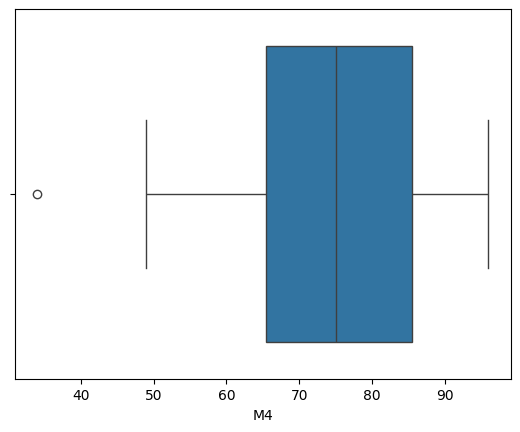

In [78]:
sns.boxplot(x=sa['M4'])
plt.show()

In [80]:
Q1 =sa['M4'].quantile(0.25)
Q3 = sa['M4'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 20.0


In [81]:
outliers_iqr = sa[
    (sa['M4'] < (Q1 - 1.5 * IQR)) |
    (sa['M4'] > (Q3 + 1.5 * IQR))
]
outliers_iqr

,SNO,REGNO,NAME,DOB,GENDER,ADDRESS,M1,M2,M3,M4,TOTAL,AVG
10,10,1220130,JAHITH,2000-11-09,MALE,THANDALAM,34.0,45.0,50.0,34.0,163.0,54.333333


In [82]:
ir_cleaned = sa[
    ~((sa['M4'] < (Q1 - 1.5 * IQR)) |
      (sa['M4'] > (Q3 + 1.5 * IQR)))
]
ir_cleaned

,SNO,REGNO,NAME,DOB,GENDER,ADDRESS,M1,M2,M3,M4,TOTAL,AVG
0,1,1220121,ARUN,2000-02-10,MALE,THANDALAM,82.0,81.0,90.0,NaN,NaN,NaN
1,2,1220122,BABU,1999-01-25,MALE,KANCHIPURAM,56.0,61.0,80.0,56.0,253.0,84.333333
2,3,1220123,CHARAN,2000.09.21,MALE,THANDALAM,NaN,59.0,60.0,70.0,NaN,0.000000
3,4,1220124,DEVA,2000-11-09,MALE,POONAMALEE,74.0,79.0,80.0,74.0,307.0,102.333333
4,5,1220125,ESTER,2000-11-21,FEMALE,CHITHUR,92.0,95.0,96.0,92.0,375.0,125.000000
5,6,1220126,FARHANA,1999-03-05,FEMALE,THANDALAM,91.0,88.0,90.0,91.0,360.0,120.000000
6,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.0,219.0,73.000000
7,7,1220127,GANI,2000-10-02,MALE,KANCHIPURAM,49.0,51.0,70.0,49.0,219.0,73.000000
8,8,1220128,HEMA,1999-01-25,FEMALE,POONAMALEE,95.0,96.0,90.0,95.0,376.0,125.333333
9,9,1220129,INDRA,2000.09.21,FEMALE,KANCHIPURAM,64.0,NaN,NaN,64.0,NaN,0.000000


In [83]:
data = [1,12,15,18,21,24,27,30,33,36,39,42,45,48,51,
        54,57,60,63,66,69,72,75,78,81,84,87,90,93]

d_z = pd.DataFrame(data, columns=['values'])
d_z

,values
0,1
1,12
2,15
3,18
4,21
5,24
6,27
7,30
8,33
9,36


In [84]:
z_scores = np.abs(stats.zscore(d_z))
z_scores


array([[1.9424333 ],
       [1.51272718],
       [1.3955346 ],
       [1.27834203],
       [1.16114945],
       [1.04395687],
       [0.92676429],
       [0.80957171],
       [0.69237914],
       [0.57518656],
       [0.45799398],
       [0.3408014 ],
       [0.22360883],
       [0.10641625],
       [0.01077633],
       [0.12796891],
       [0.24516148],
       [0.36235406],
       [0.47954664],
       [0.59673922],
       [0.7139318 ],
       [0.83112437],
       [0.94831695],
       [1.06550953],
       [1.18270211],
       [1.29989468],
       [1.41708726],
       [1.53427984],
       [1.65147242]])

In [85]:
threshold = 3
outliers_z = d_z[z_scores > threshold]
print("Outliers:")
outliers_z

Outliers:


,values


In [86]:
d_z_cleaned = d_z[z_scores <= threshold]
d_z_cleaned


,values
0,1
1,12
2,15
3,18
4,21
5,24
6,27
7,30
8,33
9,36


RESULT: 

Thus we have cleaned the data and removed the outliers by detection using IQR and Z-score method